# **Business**:Sales Revenue Prediction

_________________________________________________________________________________

## About Dataset

#### A company wants to predict monthly sales revenue based on marketing spend, pricing, promotions, and seasonality to improve budget planning and profit optimization

#### **Advertising_Spend** – Amount of money spent on advertising campaigns.
#### **Total_Marketing_Spend** – Overall expenditure on all marketing activities.
#### **Discount_Percent** – Percentage discount offered on the product.
#### **Competitor_Price** – Price of the same or similar product sold by competitors.
#### **Store_Footfall** – Number of customers visiting the store in a given period.
#### **Promotion**– Indicates whether a promotion is active (0 = No, 1 = Yes).
#### **Season_Index** – Numeric factor representing seasonal demand variation (0.8–1.2).
#### **Online_Traffic** – Number of visitors to the company’s website.
#### **Sales_Revenue** – Total income generated from product sales during a specific time period

__________________________________________________________________________

### Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### load the dataset

In [2]:
df = pd.read_csv("business_sales_regression_dataset.csv")
df.head()

,Advertising_Spend,Product_Price,Discount_Percent,Competitor_Price,Store_Footfall,Promotion,Season_Index,Online_Traffic,Sales_Revenue
0,25795,552,5,460,1608,0,0.92,23981,7.603541e+05
1,10860,475,14,677,2000,0,1.12,15067,7.212969e+05
2,64886,486,15,704,794,1,1.14,11740,9.754528e+05
3,16265,516,27,524,1947,0,0.85,16653,7.364622e+05
4,47194,426,16,621,2242,1,1.18,20222,1.358459e+06


In [3]:
print("Rows & Columns:", df.shape)
df.info()

Rows & Columns: (1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Advertising_Spend  1000 non-null   int64  
 1   Product_Price      1000 non-null   int64  
 2   Discount_Percent   1000 non-null   int64  
 3   Competitor_Price   1000 non-null   int64  
 4   Store_Footfall     1000 non-null   int64  
 5   Promotion          1000 non-null   int64  
 6   Season_Index       1000 non-null   float64
 7   Online_Traffic     1000 non-null   int64  
 8   Sales_Revenue      1000 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 70.4 KB


In [4]:
df.describe()

,Advertising_Spend,Product_Price,Discount_Percent,Competitor_Price,Store_Footfall,Promotion,Season_Index,Online_Traffic,Sales_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,44157.130000,548.386000,14.880000,564.077000,1385.412000,0.476000,0.998680,13794.605000,8.099561e+05
std,20512.188215,87.627985,8.580631,85.164747,633.259642,0.499674,0.115583,6362.722391,2.600448e+05
min,10055.000000,400.000000,0.000000,420.000000,302.000000,0.000000,0.800000,3021.000000,1.334242e+05
25%,26604.000000,473.000000,7.000000,489.750000,830.500000,0.000000,0.900000,8151.500000,6.395609e+05
50%,44726.000000,548.000000,15.000000,560.000000,1369.500000,0.000000,0.990000,13604.500000,8.127468e+05
75%,62497.250000,625.250000,22.000000,634.000000,1937.250000,1.000000,1.100000,19348.000000,9.862564e+05
max,79896.000000,699.000000,29.000000,719.000000,2497.000000,1.000000,1.200000,24944.000000,1.544033e+06


In [5]:
df.isnull().sum()

Advertising_Spend    0
Product_Price        0
Discount_Percent     0
Competitor_Price     0
Store_Footfall       0
Promotion            0
Season_Index         0
Online_Traffic       0
Sales_Revenue        0
dtype: int64

In [6]:
df.isnull().sum()

Advertising_Spend    0
Product_Price        0
Discount_Percent     0
Competitor_Price     0
Store_Footfall       0
Promotion            0
Season_Index         0
Online_Traffic       0
Sales_Revenue        0
dtype: int64

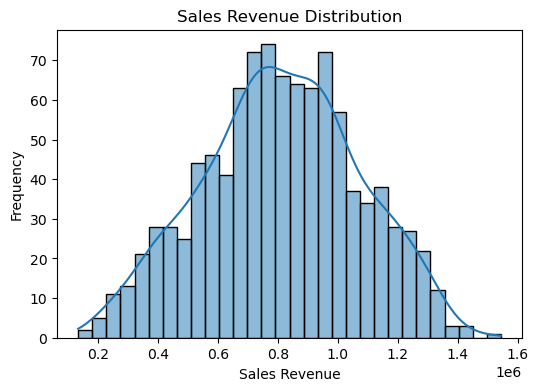

In [7]:
# Target variable distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Sales_Revenue"], bins=30, kde=True)
plt.title("Sales Revenue Distribution")
plt.xlabel("Sales Revenue")
plt.ylabel("Frequency")
plt.show()


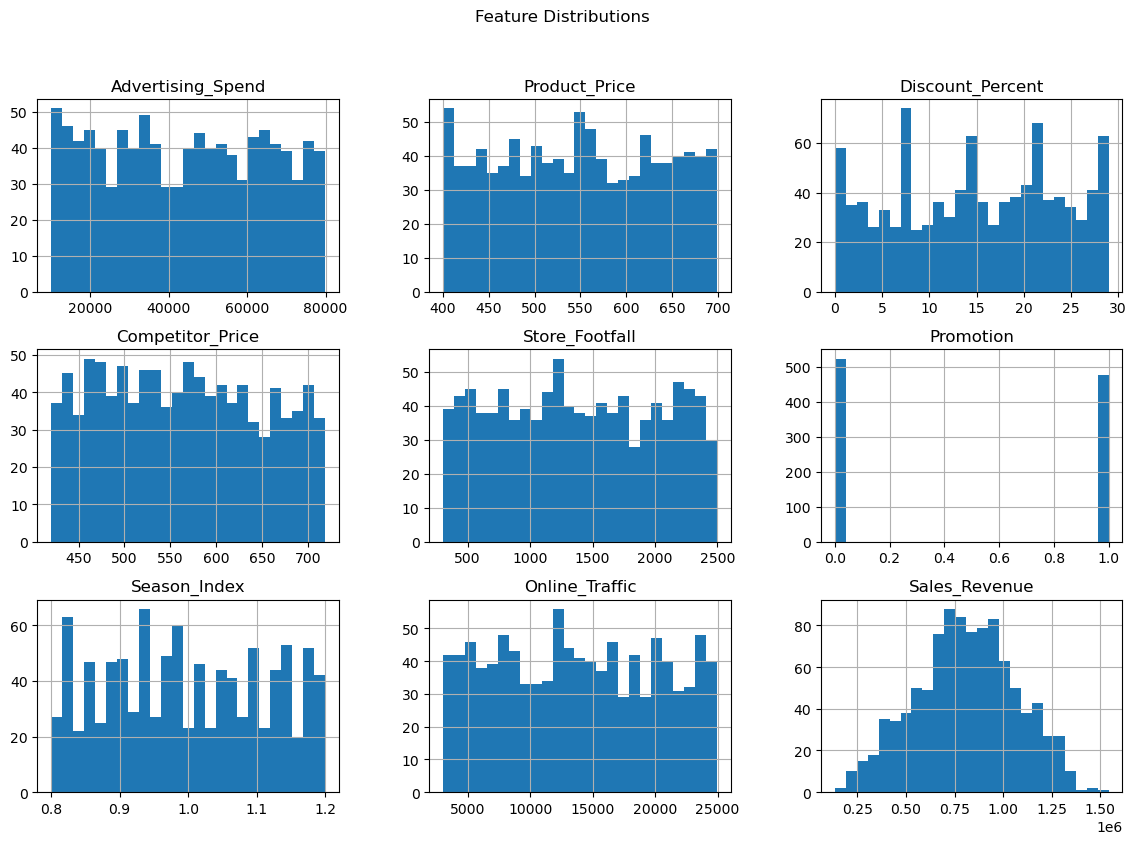

In [8]:
# Feature distribution
df.hist(figsize=(14,9), bins=25)
plt.suptitle("Feature Distributions")
plt.show()


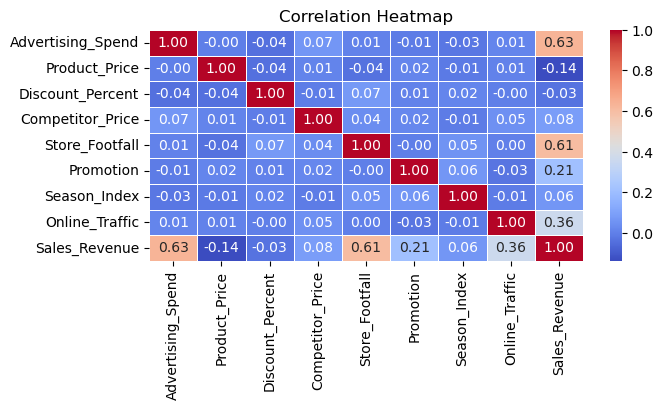

In [28]:
#correlation heatmap
plt.figure(figsize=(7,3))
corr = df.corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()


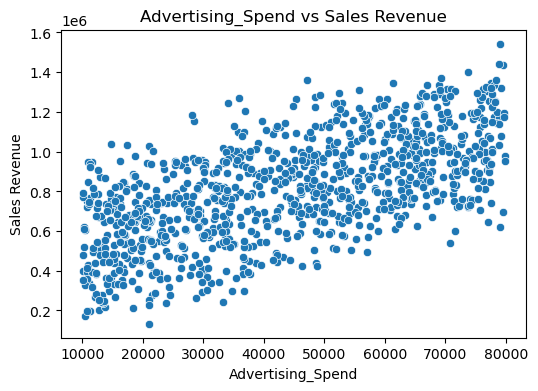

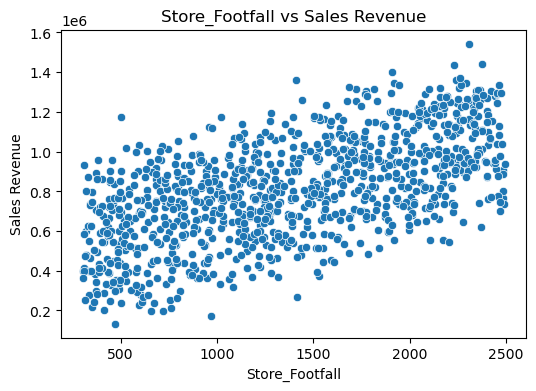

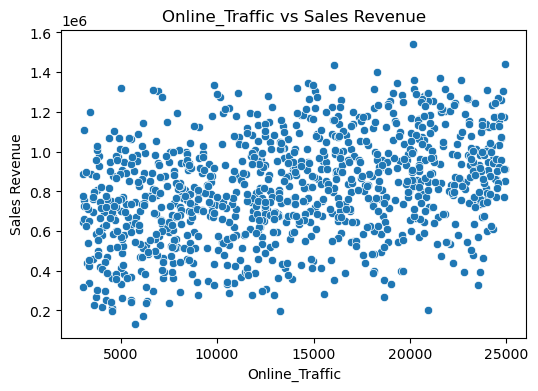

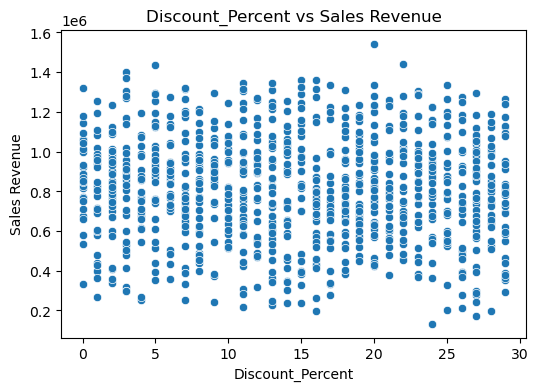

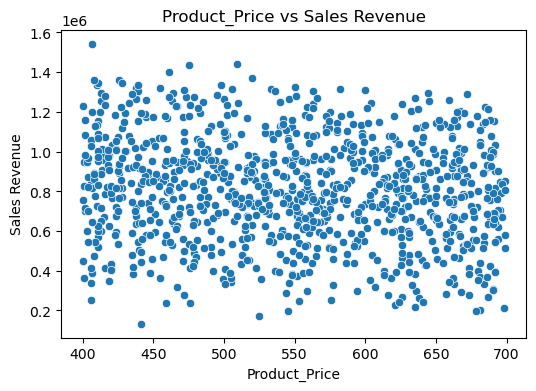

In [10]:
# sales vs key business features
features = [
    "Advertising_Spend",
    "Store_Footfall",
    "Online_Traffic",
    "Discount_Percent",
    "Product_Price"
]

for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df["Sales_Revenue"])
    plt.title(f"{feature} vs Sales Revenue")
    plt.xlabel(feature)
    plt.ylabel("Sales Revenue")
    plt.show()


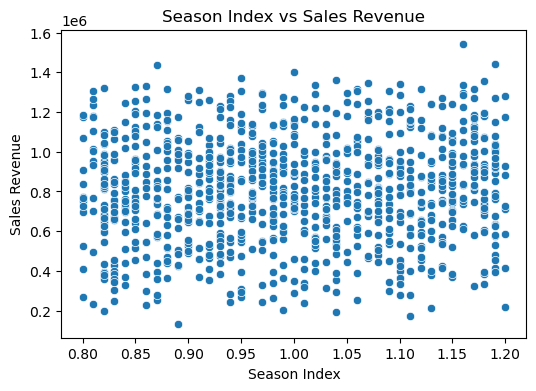

In [11]:
#seasonality effect

plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["Season_Index"],
    y=df["Sales_Revenue"]
)
plt.title("Season Index vs Sales Revenue")
plt.xlabel("Season Index")
plt.ylabel("Sales Revenue")
plt.show()


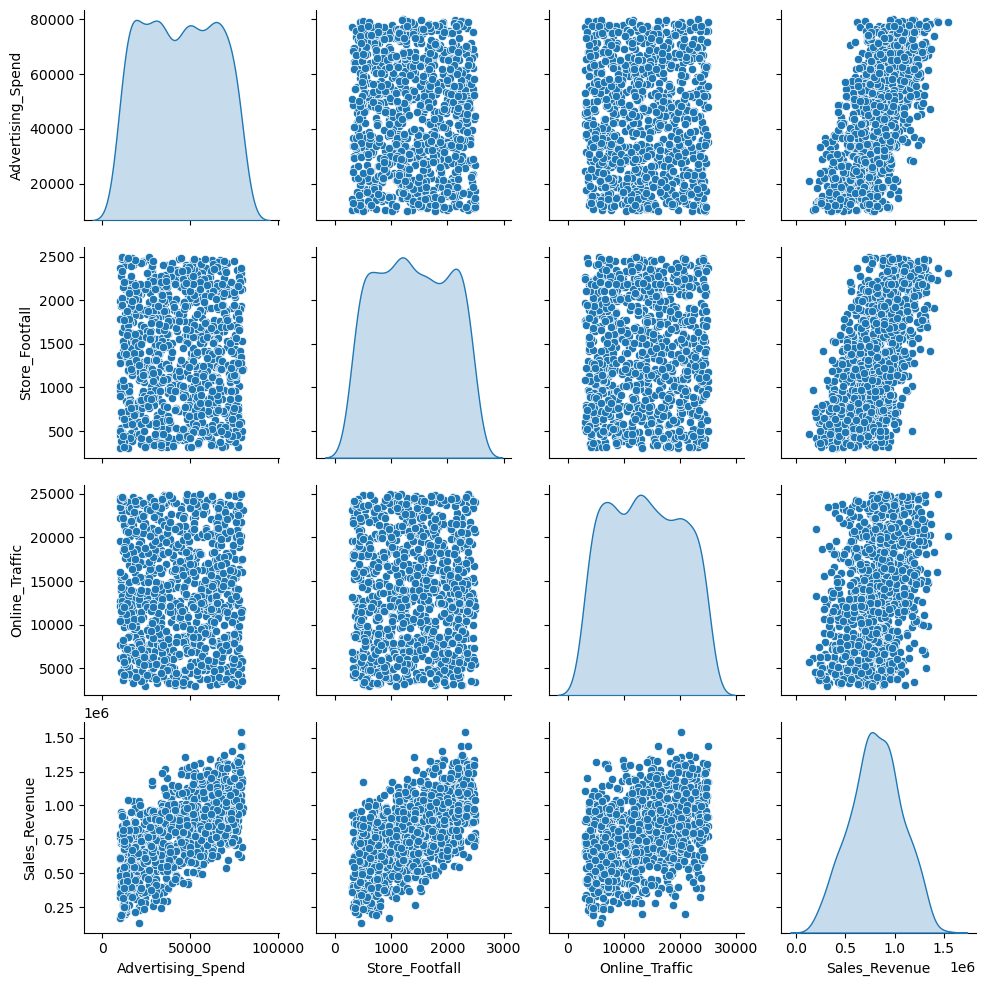

In [12]:
# pair plot(advanced insight)

sns.pairplot(
    df,
    vars=["Advertising_Spend", "Store_Footfall", "Online_Traffic", "Sales_Revenue"],
    diag_kind="kde"
)
plt.show()


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error
)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [14]:
# selection for independent and dependent 
X = df.drop("Sales_Revenue", axis=1)
y = df["Sales_Revenue"]

# split the data into test and train 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
#linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
from sklearn.metrics import r2_score
LR_Accuracy=round(r2_score(y_test,model.predict(X_test))*100)
LR_Accuracy

96

#### Modal Evaluation

In [17]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return {
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }


In [18]:
# Modal selection

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=8),
    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        random_state=42
    )
}

results = []

for name, model in models.items():
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test)
    metrics["Model"] = name
    results.append(metrics)

results_df = pd.DataFrame(results)
results_df.sort_values(by="R2", ascending=False)


,R2,MAE,RMSE,Model
0,0.964946,36571.795961,46699.320207,Linear Regression
2,0.906479,61156.964614,76277.108473,Random Forest
1,0.777833,92000.203016,117565.134580,Decision Tree


In [19]:
# Best model selection
best_model_name = results_df.sort_values("R2", ascending=False).iloc[0]["Model"]
print("Best Model:", best_model_name)


Best Model: Linear Regression


In [20]:
# fit Best model

best_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)


In [21]:
#Final model evalution

print("Final Model Performance")
print("R2 Score :", r2_score(y_test, y_pred))
print("MAE      :", mean_absolute_error(y_test, y_pred))
print("RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred)))


Final Model Performance
R2 Score : 0.9067527797938498
MAE      : 61103.847505702666
RMSE     : 76165.23453369994


In [22]:
# cross validation

cv_scores = cross_val_score(
    best_model,X, y,cv=5,scoring="r2"
)

print("CV R2 Scores:", cv_scores)
print("Mean CV R2 :", cv_scores.mean())


CV R2 Scores: [0.89233884 0.9164375  0.87548687 0.9198658  0.92038797]
Mean CV R2 : 0.904903394849252


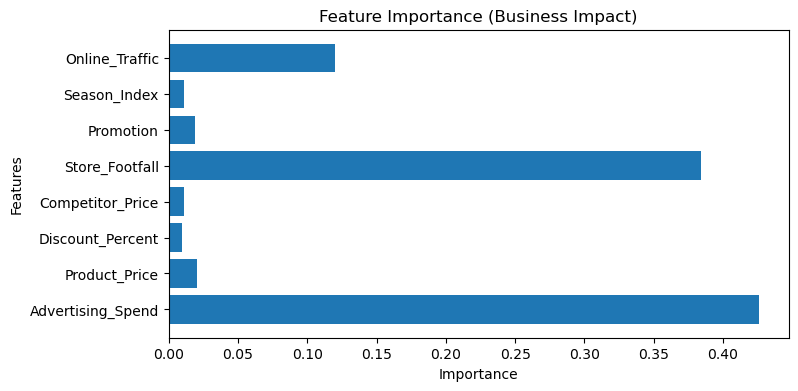

In [29]:
# Feature importance

import matplotlib.pyplot as plt
importance = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(8,4))
plt.barh(features, importance)
plt.title("Feature Importance (Business Impact)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
